<a href="https://colab.research.google.com/github/aisharamadhina/CapstoneProject/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- 1. Import library ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# --- 2. Load dataset ---
df = pd.read_csv("/content/spotify_churn_dataset.csv")

In [ ]:
# --- 3. Drop kolom yang tidak relevan ---
df = df.drop(columns=["user_id"])

In [ ]:
# --- 4. One-hot encoding untuk kolom kategori ---
df = pd.get_dummies(df, columns=["gender", "country", "subscription_type", "device_type"], drop_first=True)

In [ ]:
# --- 5. Pisahkan fitur (X) dan target (y) ---
X = df.drop(columns=["is_churned"])
y = df["is_churned"]

In [ ]:
# --- 6. Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# --- 7. Standarisasi fitur numerik ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# --- 8. Latih model klasifikasi ---
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
# --- 9. Evaluasi model ---
y_pred = model.predict(X_test_scaled)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1186
           1       0.36      0.01      0.02       414

    accuracy                           0.74      1600
   macro avg       0.55      0.50      0.44      1600
weighted avg       0.64      0.74      0.64      1600



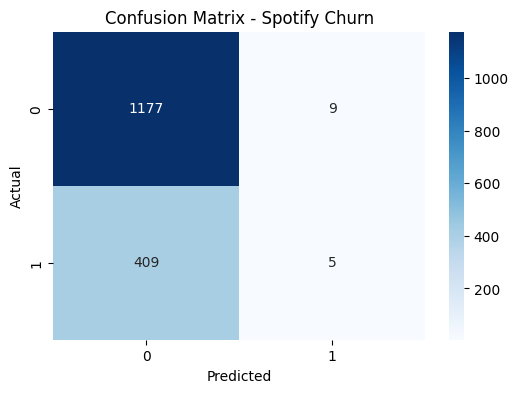

In [ ]:
# --- 10. Visualisasi confusion matrix ---
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Spotify Churn")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

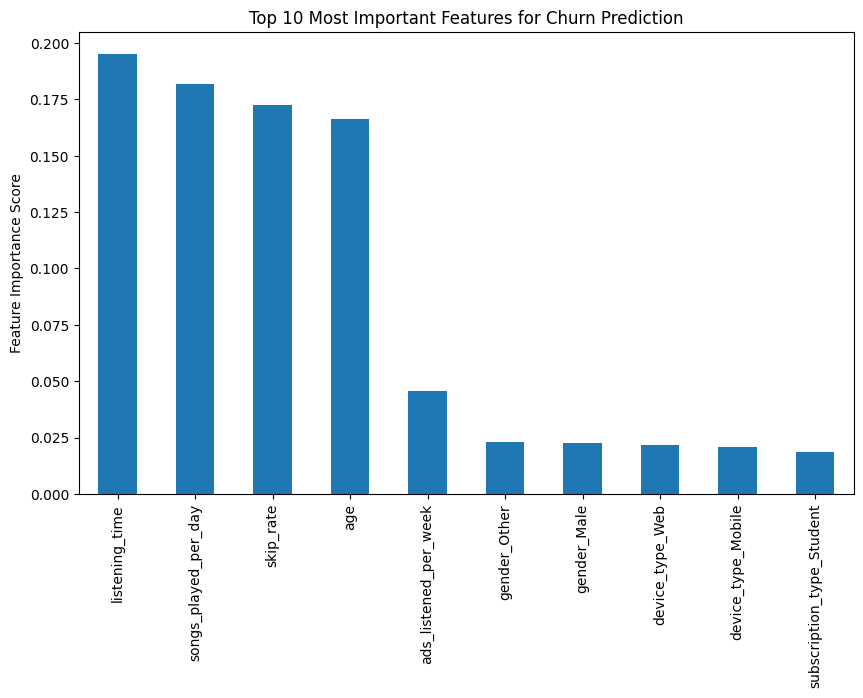

In [ ]:
# --- 10. Visualisasi confusion matrix ---
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Most Important Features for Churn Prediction")
plt.ylabel("Feature Importance Score")
plt.show()